In [2862]:
import os
import json
import univread
import numpy as np
from glob import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2863]:
experiments = [#'/mnt/HD-LSDF/Medaka/segmentations/workshop/brain_decropped/*.tif',  # original data
               '/mnt/HD-LSDF/Medaka/201905_beamtime_medaka_stained/*/brain_scaled_0.5_8bit_slices.tif',
               '/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/*/brain_scaled_0.5_8bit_slices.tif',
               '/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/*/brain_scaled_0.5_8bit_slices.tif']

In [2864]:
contains_markup_path = "/home/ws/er5241/Repos/training-repo/utilities/segm_contains_markup.json"
with open(contains_markup_path) as f:
  contains_markup_data = json.load(f)

In [2865]:
def get_rand_img_and_msk(addrs):
  rand_exp = np.random.choice(addrs)
  msk_addr = np.random.choice(glob(rand_exp))

  if 'brain_scaled' in msk_addr:
    img_addr = msk_addr.replace('brain_scaled', 'scaled')
#   elif 'medaka_decropped' in msk_addr:  # condition for original data
#     fish_id = os.path.splitext(os.path.basename(msk_addr))[0]
#     img_addrs = glob(f'/mnt/HD-LSDF/Medaka/segmentations/workshop/medaka_decropped/*{fish_id}.tif')
#     img_addr = img_addrs[0]
  else:
    raise Exception('no matching mask addr')

  return img_addr, msk_addr

### get random image and mask

In [3094]:
img_addr, msk_addr = get_rand_img_and_msk(experiments)

# img_addr = '/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1145_33-1/scaled_0.5_8bit_slices.tif'
# msk_addr = '/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1145_33-1/brain_scaled_0.5_8bit_slices.tif'
# slice_id = 2307

print(img_addr)
print(msk_addr)

img, msk = univread.read(img_addr), univread.read(msk_addr)

/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1160_39-1/scaled_0.5_8bit_slices.tif
/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1160_39-1/brain_scaled_0.5_8bit_slices.tif


In [3095]:
# slice_id = np.random.randint(msk.shape[0])  # random slice

# ne_slc = np.where(msk.sum((1, 2))>0)[0]
# slice_id = ne_slc[len(ne_slc)//2]  # mid non empty slice

In [3096]:
# I would say, 50% with labels presented,
# 25% sampled near the labels (in case there should be labels, but they are absent),
# and 25% far outside the main labeled part.

total_slc = msk.shape[0]
# ne_slc = list(np.where(msk.sum((1, 2))>0)[0])
ne_slc = list(np.where(contains_markup_data[msk_addr])[0])

if ne_slc:
  ne_start, ne_end = ne_slc[0], ne_slc[-1]

  x = np.random.randint(100)
  if x < 25:  # 25% outside labelled
    if np.random.choice((True,False)):  # chose from the beginning
      slice_id = np.random.randint(0, int(.75 * ne_start))
    else:  # chose from the end
      slice_id = np.random.randint(ne_end + int(.25 * (total_slc-ne_end)), total_slc)

  elif (x>=25 and x<50):  # 25% near labelled
    if np.random.choice((True,False)):  # chose from the beginning
      slice_id = np.random.randint(int(.75*ne_start), ne_start)
    else:  # chose from the end
      slice_id = np.random.randint(ne_end, ne_end + int(.25 * (total_slc-ne_end)))

  else:  # 50% with labels
    slice_id = np.random.choice(ne_slc)
    
else:
  slice_id = np.random.randint(msk.shape[0])  # random slice

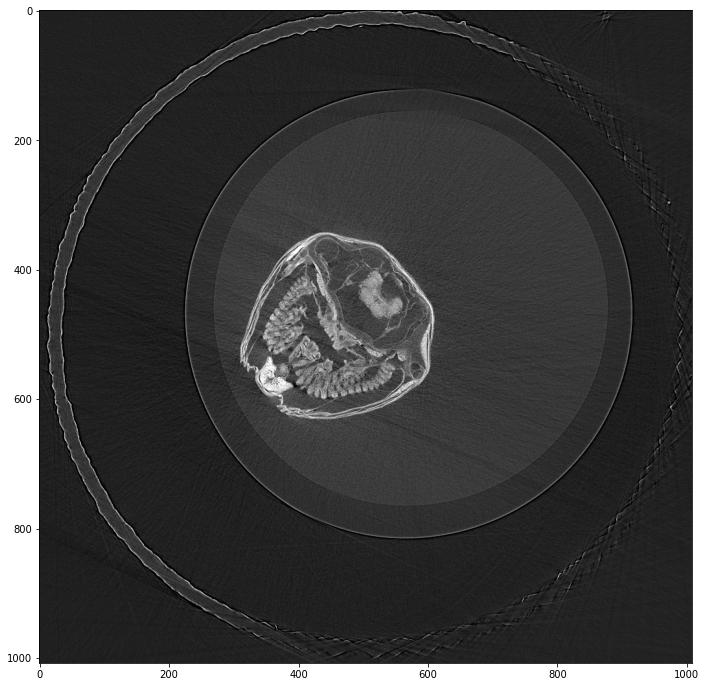

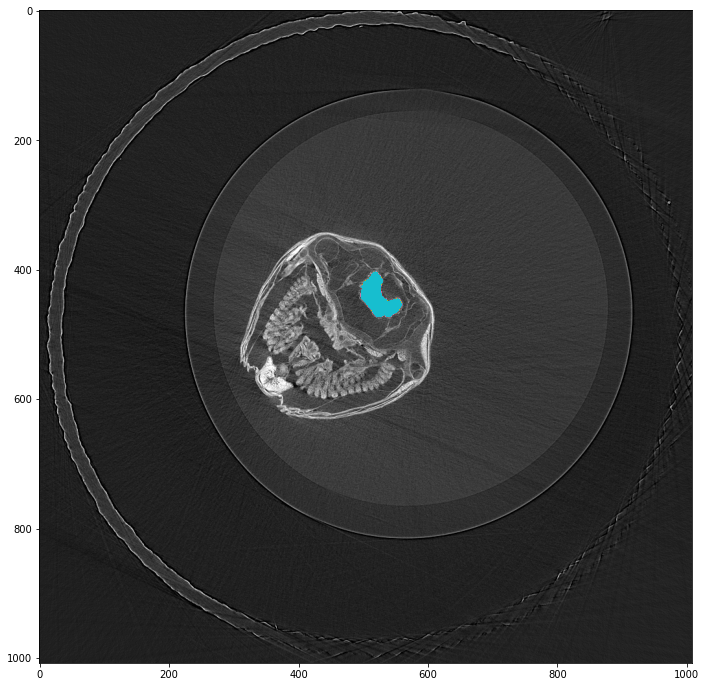

2218


In [3097]:
fig, axs = plt.subplots(1,1, figsize=(12,12))

#plt.axes(axs[0])
plt.imshow(img[slice_id], cmap='gray', alpha=1.0)
plt.show()

fig, axs = plt.subplots(1,1, figsize=(12,12))
plt.imshow(img[slice_id], cmap='gray', alpha=1.0)
plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*1.0)
plt.show()

print(slice_id)

In [3098]:
sliceQuality_data = load_json()
save_json(sliceQuality_data, msk_addr, int(slice_id), 'good')

In [3109]:
sliceQuality_data = load_json()

total_slc = sum([len(v) for v in sliceQuality_data.values()])
print(f'total: {total_slc}')
good, bad, mid = 0,0,0
for slice_vals in sliceQuality_data.values():
  for slice_val in slice_vals.values():
    if slice_val == 'good':
      good += 1
    elif slice_val == 'bad':
      bad += 1
    elif slice_val == 'mid':
      mid += 1  
print(f'good: {good}, bad: {bad}, mid: {mid}')

list(sliceQuality_data.items())[-5:]

total: 1000
good: 725, bad: 256, mid: 19


[('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1182_55-2/brain_scaled_0.5_8bit_slices.tif',
  {'2125': 'good'}),
 ('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1292_106-1/brain_scaled_0.5_8bit_slices.tif',
  {'3191': 'good'}),
 ('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_998_72-1_unstained/brain_scaled_0.5_8bit_slices.tif',
  {'137': 'good'}),
 ('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1267_95-1/brain_scaled_0.5_8bit_slices.tif',
  {'3182': 'good'}),
 ('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_868_32-2/brain_scaled_0.5_8bit_slices.tif',
  {'34': 'good'})]

In [18]:
import json
from tqdm.auto import tqdm
from univread import read as imread
from torch.utils.data import Dataset

class LabelledSlicesDataset(Dataset):
    """Manually Labelled Slices dataset."""

    def __init__(self, sliceQuality_data_path):
        """
        Args:
            sliceQuality_data_path (string): Path to the json file with slices.
        """
        with open(sliceQuality_data_path, 'r') as fp:
          sliceQuality_data = json.load(fp)
          
        self.labelledSlices = []
        lbl_dict = {'good': 0, 'bad': 1}
        for msk_addr, slcs in tqdm(list(sliceQuality_data.items())[:5]):
          for slc_id, slc_lbl in slcs.items():
            if slc_lbl in ['good', 'bad']:  # ignore mid
              img_addr = msk_addr.replace('brain_scaled', 'scaled')
              img = imread(img_addr, lazy=True)[int(slc_id)]
              msk = imread(msk_addr, lazy=True)[int(slc_id)]
              idx = msk!= 0
              img[idx] = msk[idx]
              self.labelledSlices.append((img, slc_lbl))

    def __len__(self):
        return len(self.labelledSlices)

    def __getitem__(self, idx):
        slc, slc_lbl = self.labelledSlices[idx]
        return slc, slc_lbl
            
            
my_data = LabelledSlicesDataset("/home/ws/er5241/Repos/training-repo/utilities/manual_labels.json")

  0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
import numpy as np
from sklearn.metrics import classification_report

x = np.random.randint(0,2,64)
y = np.random.randint(0,2,64)
classification_report(x,y,output_dict=True)['0']['f1-score']

0.40625

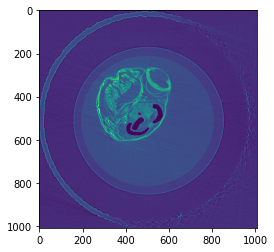

In [19]:
import matplotlib.pyplot as plt
plt.imshow(my_data[0][0])

In [3]:
import os
os.chdir('/home/ws/er5241/Repos/training-repo')

import src.datasets

labelledSlices = src.datasets.classification_addr_slices("/home/ws/er5241/Repos/training-repo/utilities/manual_labels.json")
#src.datasets.LabelledSlicesDataset(labelledSlices)
labelledSlices

[(('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1111_20-1/brain_scaled_0.5_8bit_slices.tif',
   '2196'),
  'bad'),
 (('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1111_20-1/brain_scaled_0.5_8bit_slices.tif',
   '2312'),
  'bad'),
 (('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1111_20-1/brain_scaled_0.5_8bit_slices.tif',
   '2418'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1111_20-1/brain_scaled_0.5_8bit_slices.tif',
   '2419'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1398_135-2/brain_scaled_0.5_8bit_slices.tif',
   '3246'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1398_135-2/brain_scaled_0.5_8bit_slices.tif',
   '3137'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1398_135-2/brain_scaled_0.5_8bit_slices.tif',
   '138'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1275_95-1/brain_scaled_0.5_8bit_slices.tif',
   '1359'),
  'good'),
 (('/mnt/HD-LSDF/Medaka/

In [3139]:
msk, lbl = my_data[0]

In [3138]:
for msk_addr, slcs in sliceQuality_data.items():
  for slc_id, slc_lbl in slcs.items():
    if slc_id=='2539':
      print(msk_addr, slc_id, slc_lbl)

/mnt/HD-LSDF/Medaka/202012_beamtime_medaka/Medaka_1177_55-2/brain_scaled_0.5_8bit_slices.tif 2539 mid
/mnt/HD-LSDF/Medaka/201912_beamtime_medaka/Medaka_1245_84-2/brain_scaled_0.5_8bit_slices.tif 2539 good


In [ ]:
def slice_classifier_matcher(sliceQuality_data_path = "/home/ws/er5241/Repos/training-repo/utilities/manual_labels.json"):
  with open(sliceQuality_data_path, 'r') as fp:
      sliceQuality_data = json.load(fp)
  for slice_vals in sliceQuality_data.values():
    for slice_val in slice_vals.values():

In [ ]:
targets= '/mnt/HD-LSDF/Medaka/segmentations/workshop/brain_decropped/{}.tif'
volumes= '/mnt/HD-LSDF/Medaka/segmentations/workshop/medaka_decropped/{}.tif'

path_formatter = lambda path_, ids: [path_.format(i) for i in ids]

def supervised_segmentation_target_matcher(volumes, targets):
    label_ids = [os.path.basename(i).split('.')[-2] for i in glob(targets.format('*'))]
    if '-' in label_ids[0]:
        volume_ids = [i.split('-')[1] for i in label_ids]
    else:
        volume_ids = label_ids
    return list(zip(path_formatter(volumes, volume_ids), path_formatter(targets, label_ids)))
  
supervised_segmentation_target_matcher(volumes, targets)

In [5]:
def load_json():
  with open('manual_labels.json', 'r') as fp:
    try:
      sliceQuality_data = json.load(fp)
    except Exception:
      sliceQuality_data = {}
  return sliceQuality_data

def save_json(sliceQuality_data, msk_addr, slice_id, label):
  # label should be one of good/mid/bad
  if label not in ['good', 'mid', 'bad']:
    raise Exception('faulty label')

  if msk_addr not in sliceQuality_data:
    sliceQuality_data[msk_addr] = {slice_id : label}
  else:
    sliceQuality_data[msk_addr].update({slice_id : label})
  
  with open('manual_labels.json', 'w') as fp:
    json.dump(sliceQuality_data, fp)

In [95]:
DoD = {
  'abc': {0:'good', 10:'bad'},
  'xyz': {1:'good', 9:'bad'},
}

In [96]:
DoD['xyz'].update({5:'mid'})

DoD

{'abc': {0: 'good', 10: 'bad'}, 'xyz': {1: 'good', 9: 'bad', 5: 'mid'}}

### save collected slices

In [1305]:
for msk_addr,slices in tqdm(sliceQuality_data.items()):
  img_addr = msk_addr.replace('brain_scaled', 'scaled')
  expr, fish = msk_addr.split('/')[4:6]
  expr_year = expr.split('_')[0]
  
  img, msk = univread.read(img_addr), univread.read(msk_addr)

  for slice_id, slice_label in slices.items():
    slice_id = int(slice_id)
    fig, axs = plt.subplots(1,1, figsize=(12,12))
    plt.imshow(img[slice_id], cmap='gray', alpha=0.5)
    plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*1.0)
    plt.title(f'slice: {slice_id}')
    # plt.show()
    fname = f'{expr_year}_{fish}_{slice_id}.png'
    fpath = f'/home/ws/er5241/Repos/training-repo/utilities/lablled_slices/{slice_label}/{fname}'
    plt.savefig(fpath)
    plt.close(fig)

  0%|          | 0/178 [00:00<?, ?it/s]